What are the key factors influencing customer purchasing behavior?
- Analyze historical sales data to identify patterns and trends.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

customers_df = pd.read_csv('Customers.csv')

# Customers_df

In [2]:
customers_df.info()
# Dropping the 'Unnamed: 0' column as it is not needed for the analysis
customers_df.drop(columns=['Unnamed: 0'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   100000 non-null  int64  
 1   CustomerID                   100000 non-null  int64  
 2   Age                          100000 non-null  int64  
 3   Gender                       100000 non-null  object 
 4   Payment Method               100000 non-null  object 
 5   Churn                        100000 non-null  int64  
 6   Tenure                       100000 non-null  float64
 7   HourSpendOnApp               100000 non-null  float64
 8   NumberOfDeviceRegistered     100000 non-null  int64  
 9   SatisfactionScore            100000 non-null  int64  
 10  OrderAmountHikeFromlastYear  100000 non-null  float64
 11  CouponUsed                   100000 non-null  float64
 12  OrderCount                   100000 non-null  float64
 13  

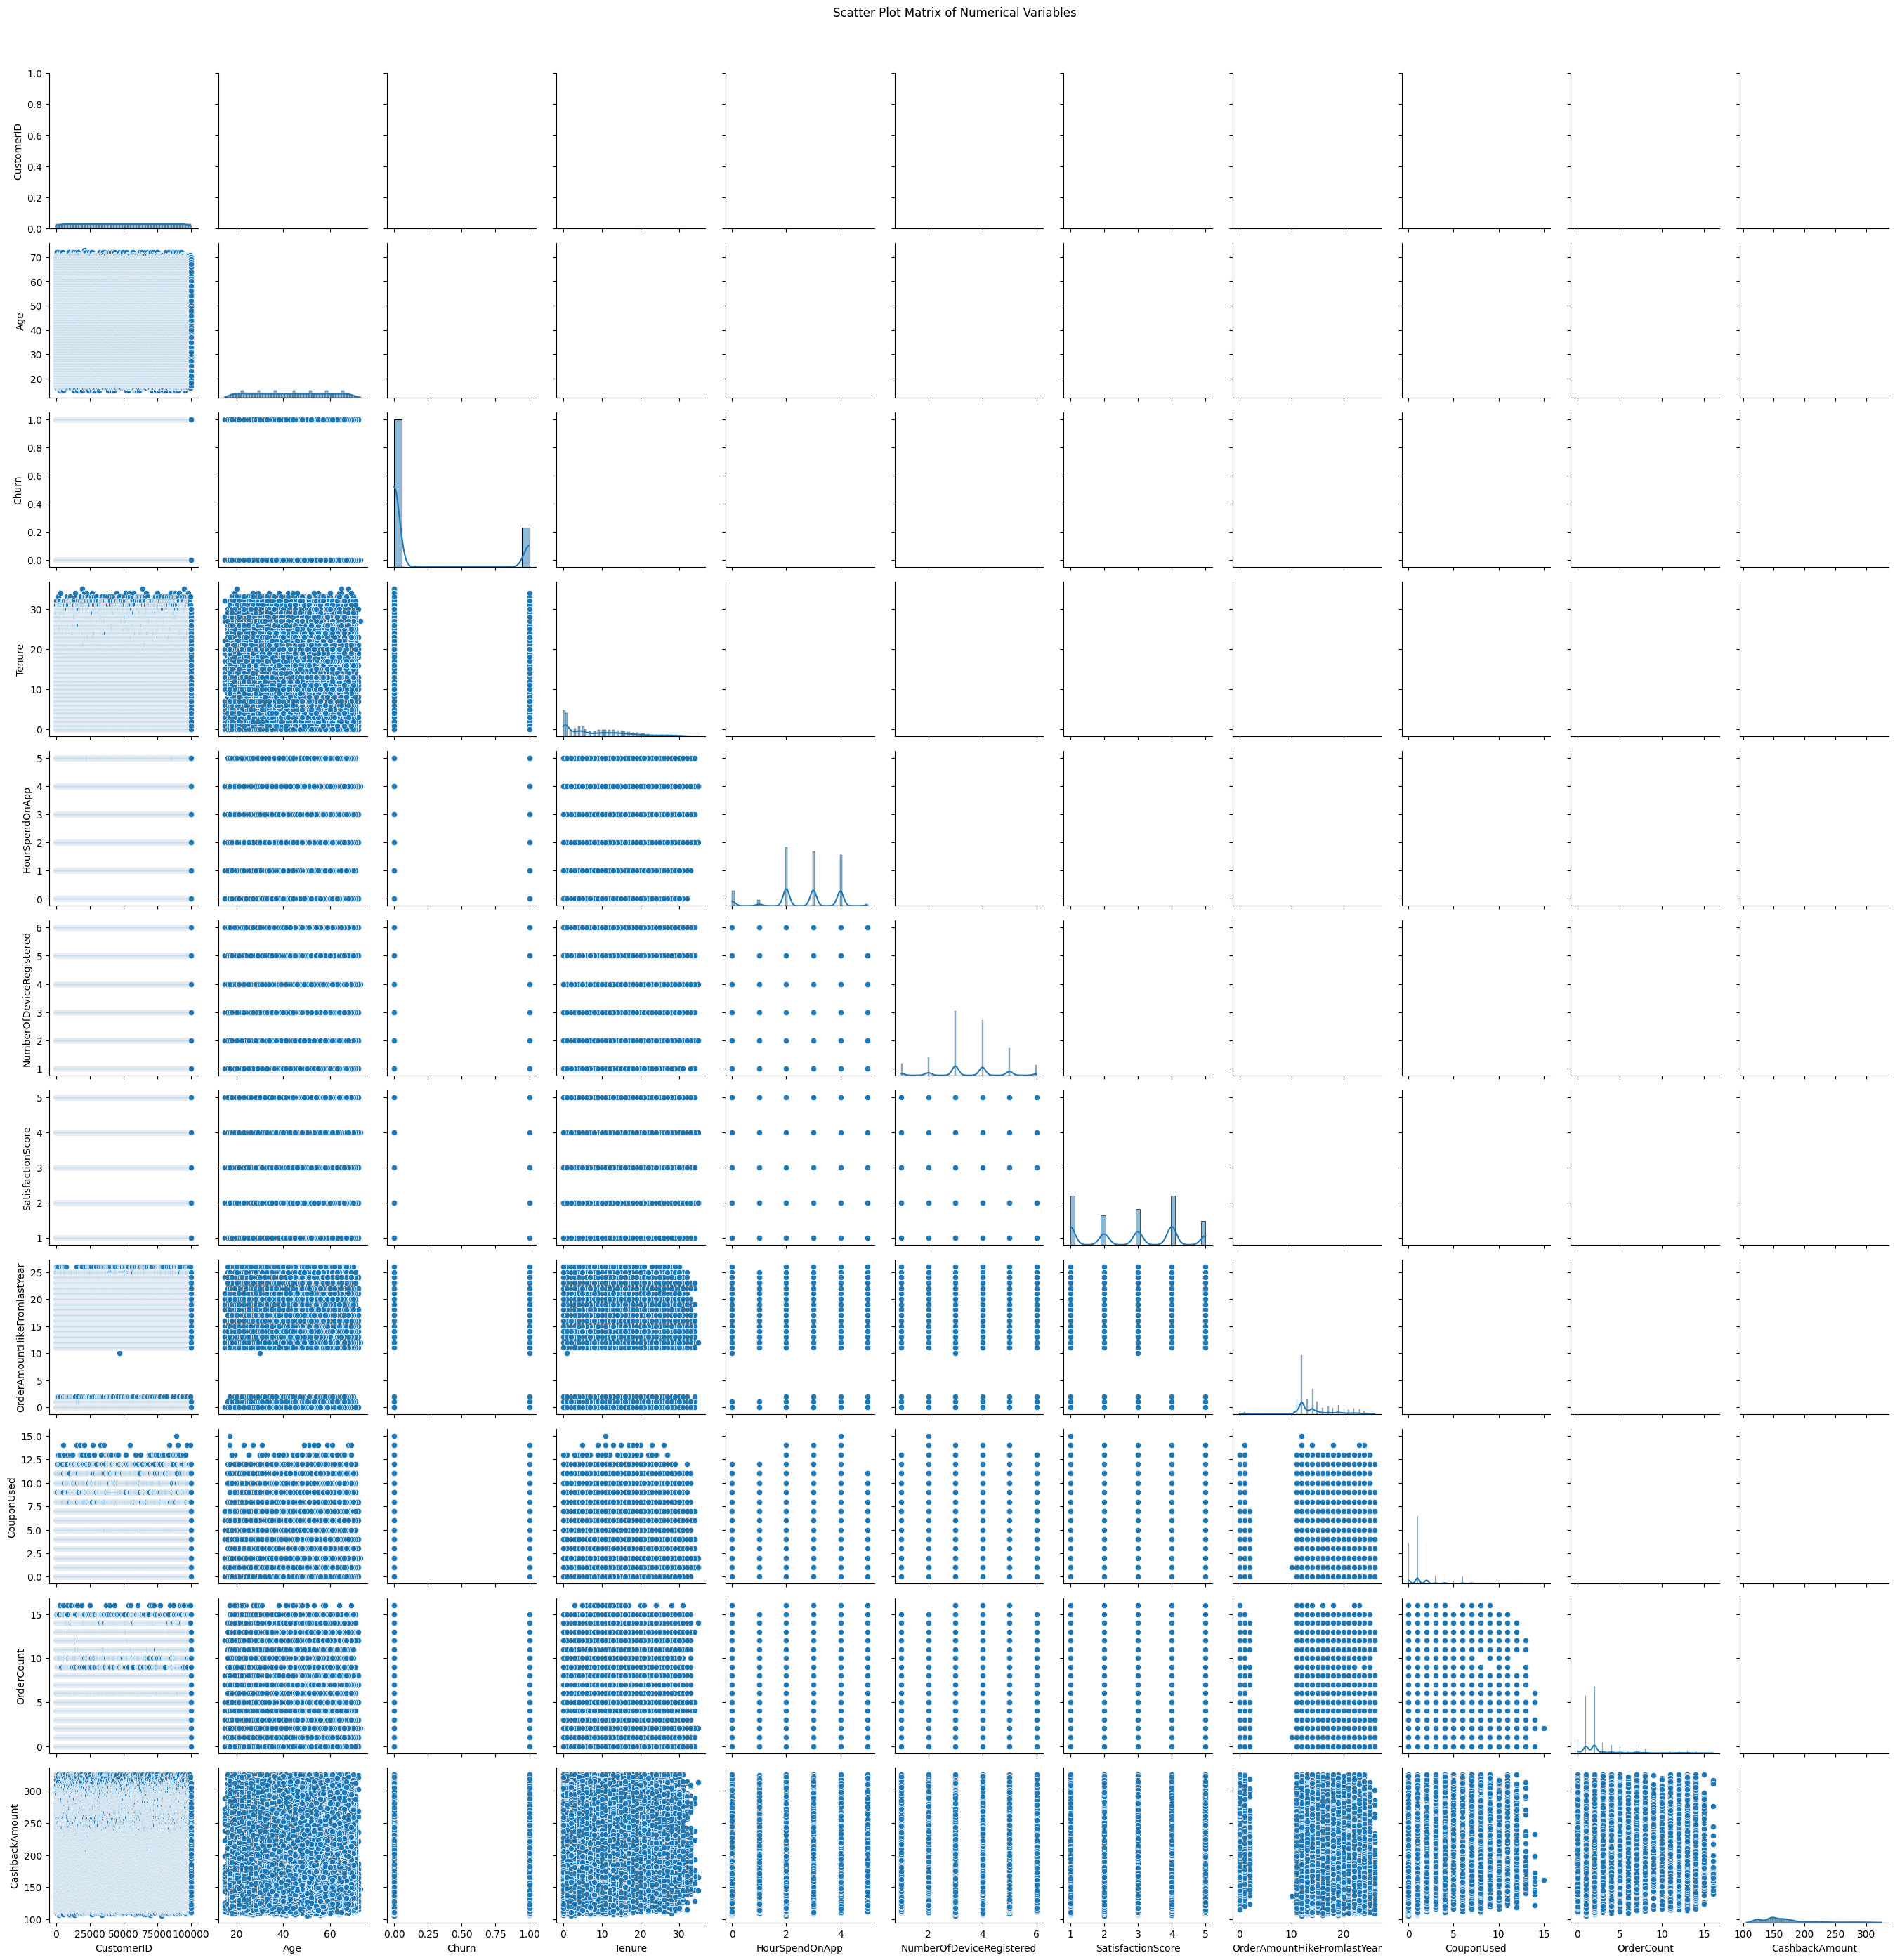

In [8]:
# Extracting numerical columns for the scatter plot matrix
numerical_columns = customers_df.select_dtypes(include=[np.number]).columns

# Creating a pair grid for scatter plots below the diagonal
grid = sns.PairGrid(customers_df, vars=numerical_columns)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot, kde=True)

# Adding titles and displaying the plot
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

## Age distribution of customers

We will visualise the distribution of customer age since the one in the pairwise scatter plot is too small

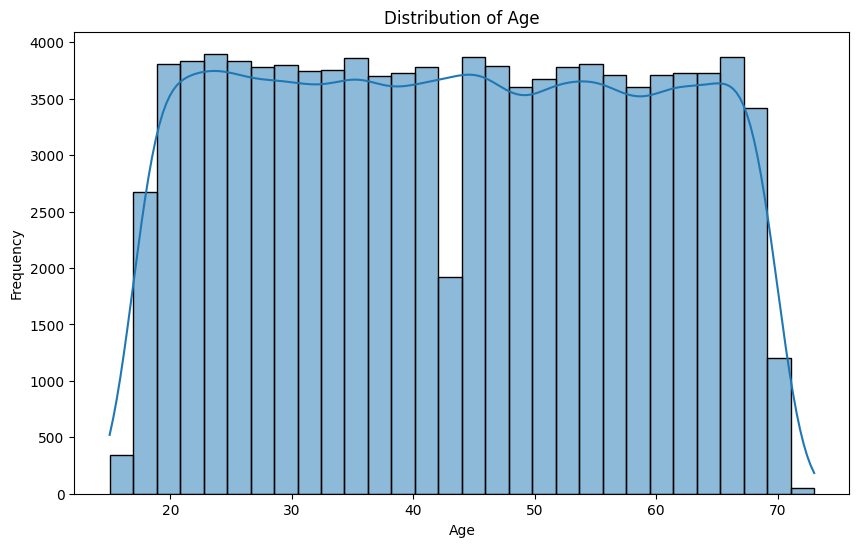

In [52]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

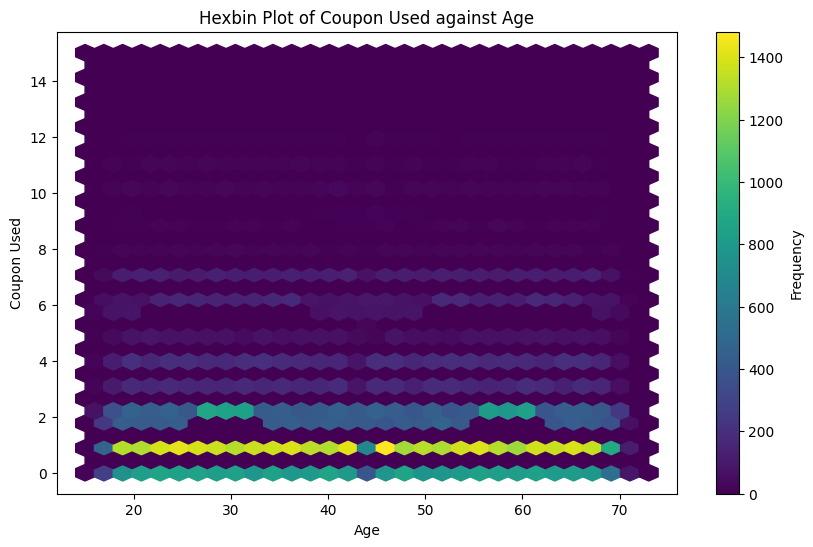

In [32]:
# Plotting a hexbin plot to visualize the distribution of CouponUsed against Age
plt.figure(figsize=(10, 6))
hb = plt.hexbin(customers_df['Age'], customers_df['CouponUsed'], gridsize=30, cmap="viridis")

# Adding a color bar and labels
plt.colorbar(hb, label='Frequency')
plt.title('Hexbin Plot of Coupon Used against Age')
plt.xlabel('Age')
plt.ylabel('Coupon Used')
plt.show()

Most customer used 2 coupons in the last month, quite a lot used 1 coupon in the last month, a noticeable customer used 3. A small amount of customers used 3,4,6 or 7 coupons amount. they are probably high value customers?

## Order Amount Hike From last year distribution

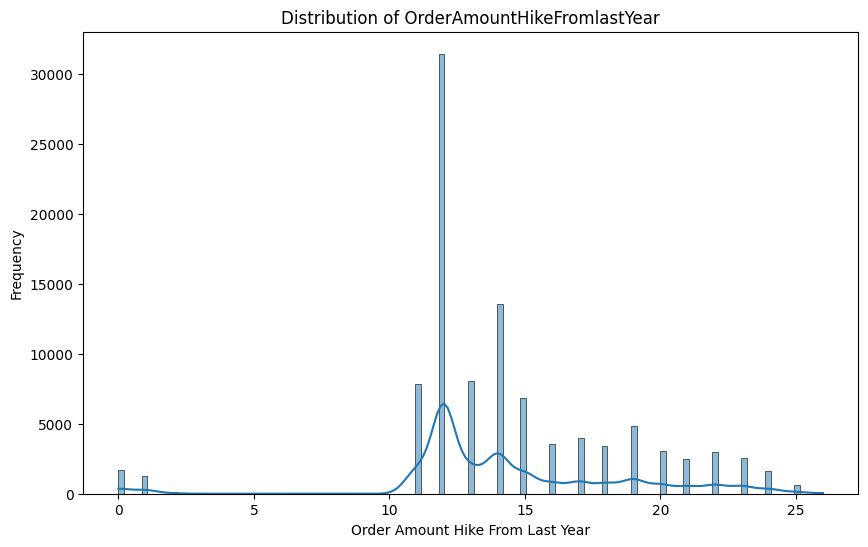

In [20]:
# Plotting the distribution of OrderAmountHikeFromlastYear
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['OrderAmountHikeFromlastYear'], kde=True)

# Adding titles and labels
plt.title('Distribution of OrderAmountHikeFromlastYear')
plt.xlabel('Order Amount Hike From Last Year')
plt.ylabel('Frequency')
plt.show()

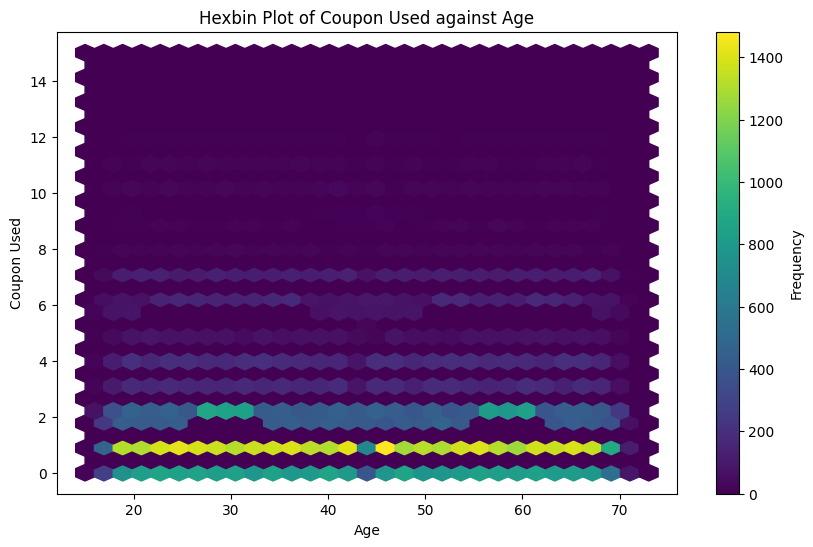

In [87]:
# Plotting a hexbin plot to visualize the distribution of CouponUsed against Age
plt.figure(figsize=(10, 6))
hb = plt.hexbin(customers_df['Age'], customers_df['CouponUsed'], gridsize=30, cmap="viridis")

# Adding a color bar and labels
plt.colorbar(hb, label='Frequency')
plt.title('Hexbin Plot of Coupon Used against Age')
plt.xlabel('Age')
plt.ylabel('Coupon Used')
plt.show()

# product_df

In [7]:
products_df = pd.read_csv("Products Table.csv")
products_df.drop(columns=['Unnamed: 0'], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     20493 non-null  int64  
 1   Product Name  20493 non-null  object 
 2   Category      20493 non-null  object 
 3   Price         20493 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 640.5+ KB


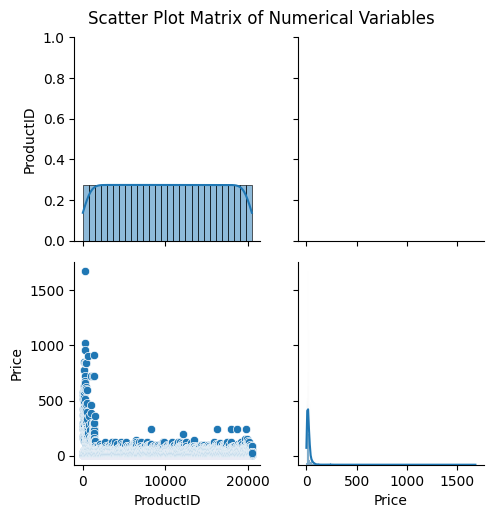

In [8]:
# Extracting numerical columns for the scatter plot matrix
numerical_columns = products_df.select_dtypes(include=[np.number]).columns

# Creating a pair grid for scatter plots below the diagonal
grid = sns.PairGrid(products_df, vars=numerical_columns)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot, kde=True)

# Adding titles and displaying the plot
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

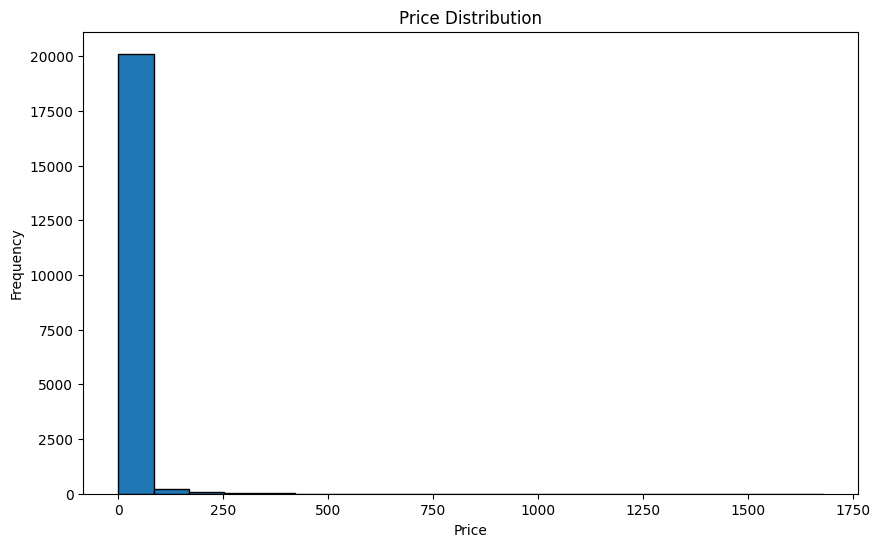

In [16]:
# Plotting the price distribution
plt.figure(figsize=(10, 6))
plt.hist(products_df['Price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most products are within 500 dollars

## Top 10 most expensive products

In [10]:
# Sorting the DataFrame by 'Product Price' in descending order
top_10_expensive_products = products_df.sort_values(by='Price', ascending=False).head(10)

# Selecting the relevant columns
top_10_expensive_products = top_10_expensive_products[['Product Name', 'Price', 'Category']]

# Displaying the top 10 most expensive products
print(top_10_expensive_products)

                                           Product Name    Price  \
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...  1678.80   
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...  1020.00   
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...   959.88   
1349  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   911.88   
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   899.99   
192   Samsung 138 cm (55 inches) Crystal 4K Neo Seri...   850.80   
332   MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...   839.99   
325   OnePlus 163.8 cm (65 inches) U Series 4K LED S...   839.99   
276   Samsung 138 cm (55 inches) Crystal 4K Series U...   838.80   
150   VU 138 cm (55 inches) Premium Series 4K Ultra ...   780.00   

             Category  
249       Electronics  
255       Electronics  
283       Electronics  
1349  Home Appliances  
568       Electronics  
192       Electronics  
332       Electronics  
325       Electronics  
276       Electronics  
150       E

Based on this, we realise that there is only 1 product that costs that much more than other products, which is the Sony tv. It costs 1678. The next most expensive product only costs 1000 dollars.

## Top 10 cheapest product

In [12]:
# Sorting the DataFrame by 'Product Price' in descending order
top_10_cheapest_products = products_df.sort_values(by='Price', ascending=True).head(10)

# Selecting the relevant columns
top_10_cheapest_products = top_10_cheapest_products[['Product Name', 'Price', 'Category']]

# Displaying the top 10 most expensive products
print(top_10_cheapest_products)

                                           Product Name  Price  \
972   E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...   0.47   
994   Inventis 5V 1.2W Portable Flexible USB LED Lig...   0.47   
615   Classmate Octane Neon- Blue Gel Pens(Pack of 5...   0.60   
709   E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...   0.71   
8228  LPX® Save Your Bra Increase Band Length-Bra Ex...   0.71   
809   Classmate Pulse Spiral Notebook - 240 mm x 180...   0.90   
1161  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...   0.95   
1091  VR 18 Pcs - 3 Different Size Plastic Food Snac...   1.07   
6249                              Womens Leggings Green   1.08   
852     Apsara Platinum Pencils Value Pack - Pack of 20   1.19   

             Category  
972       Electronics  
994       Electronics  
615    OfficeProducts  
709       Electronics  
8228         Clothing  
809    OfficeProducts  
1161  Home Appliances  
1091  Home Appliances  
6249         Clothing  
852   Home Appliances  


## Distribution of categories

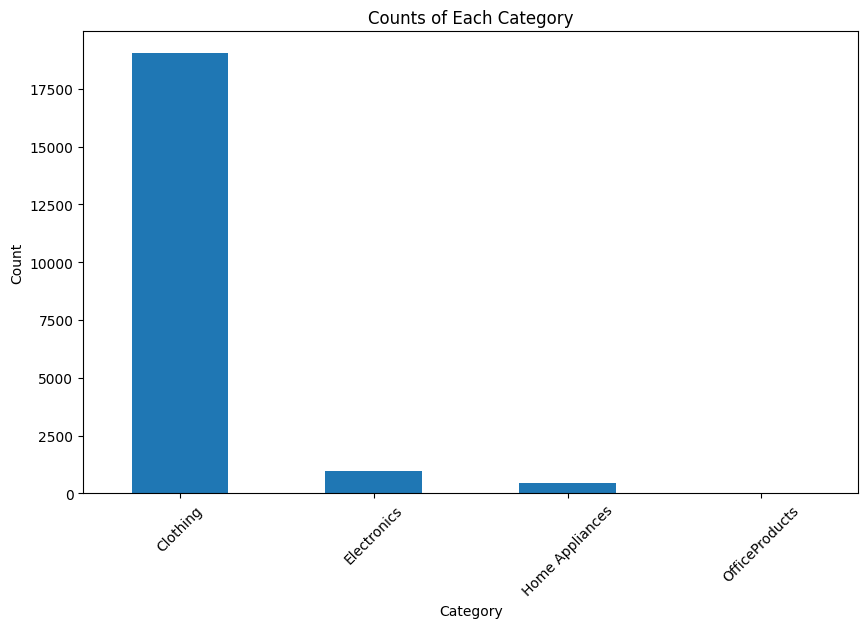

In [13]:
# Plotting the count of each category
category_counts = products_df['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [68]:
category_counts

Category
Clothing           19033
Electronics          979
Home Appliances      450
OfficeProducts        31
Name: count, dtype: int64

What we  sell: Mostly Clothing.

Some electronics and home appliances. A small amount of Office Products

# orders_df

In [14]:
orders_df = pd.read_csv("Orders Table.csv")
orders_df.drop(columns=['Unnamed: 0'], inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168946 entries, 0 to 168945
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OrderID                      168946 non-null  int64  
 1   ProductID                    168946 non-null  int64  
 2   CustomerID                   168946 non-null  int64  
 3   Order Date                   168946 non-null  object 
 4   Shipping Date                168946 non-null  object 
 5   Actual days for shipping     168946 non-null  int64  
 6   Scheduled days for shipping  168946 non-null  int64  
 7   Late Delivery Risk           168946 non-null  int64  
 8   Discount Percentage          168946 non-null  float64
 9   Returns                      168946 non-null  int64  
 10  Promotional Period           168946 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 14.2+ MB


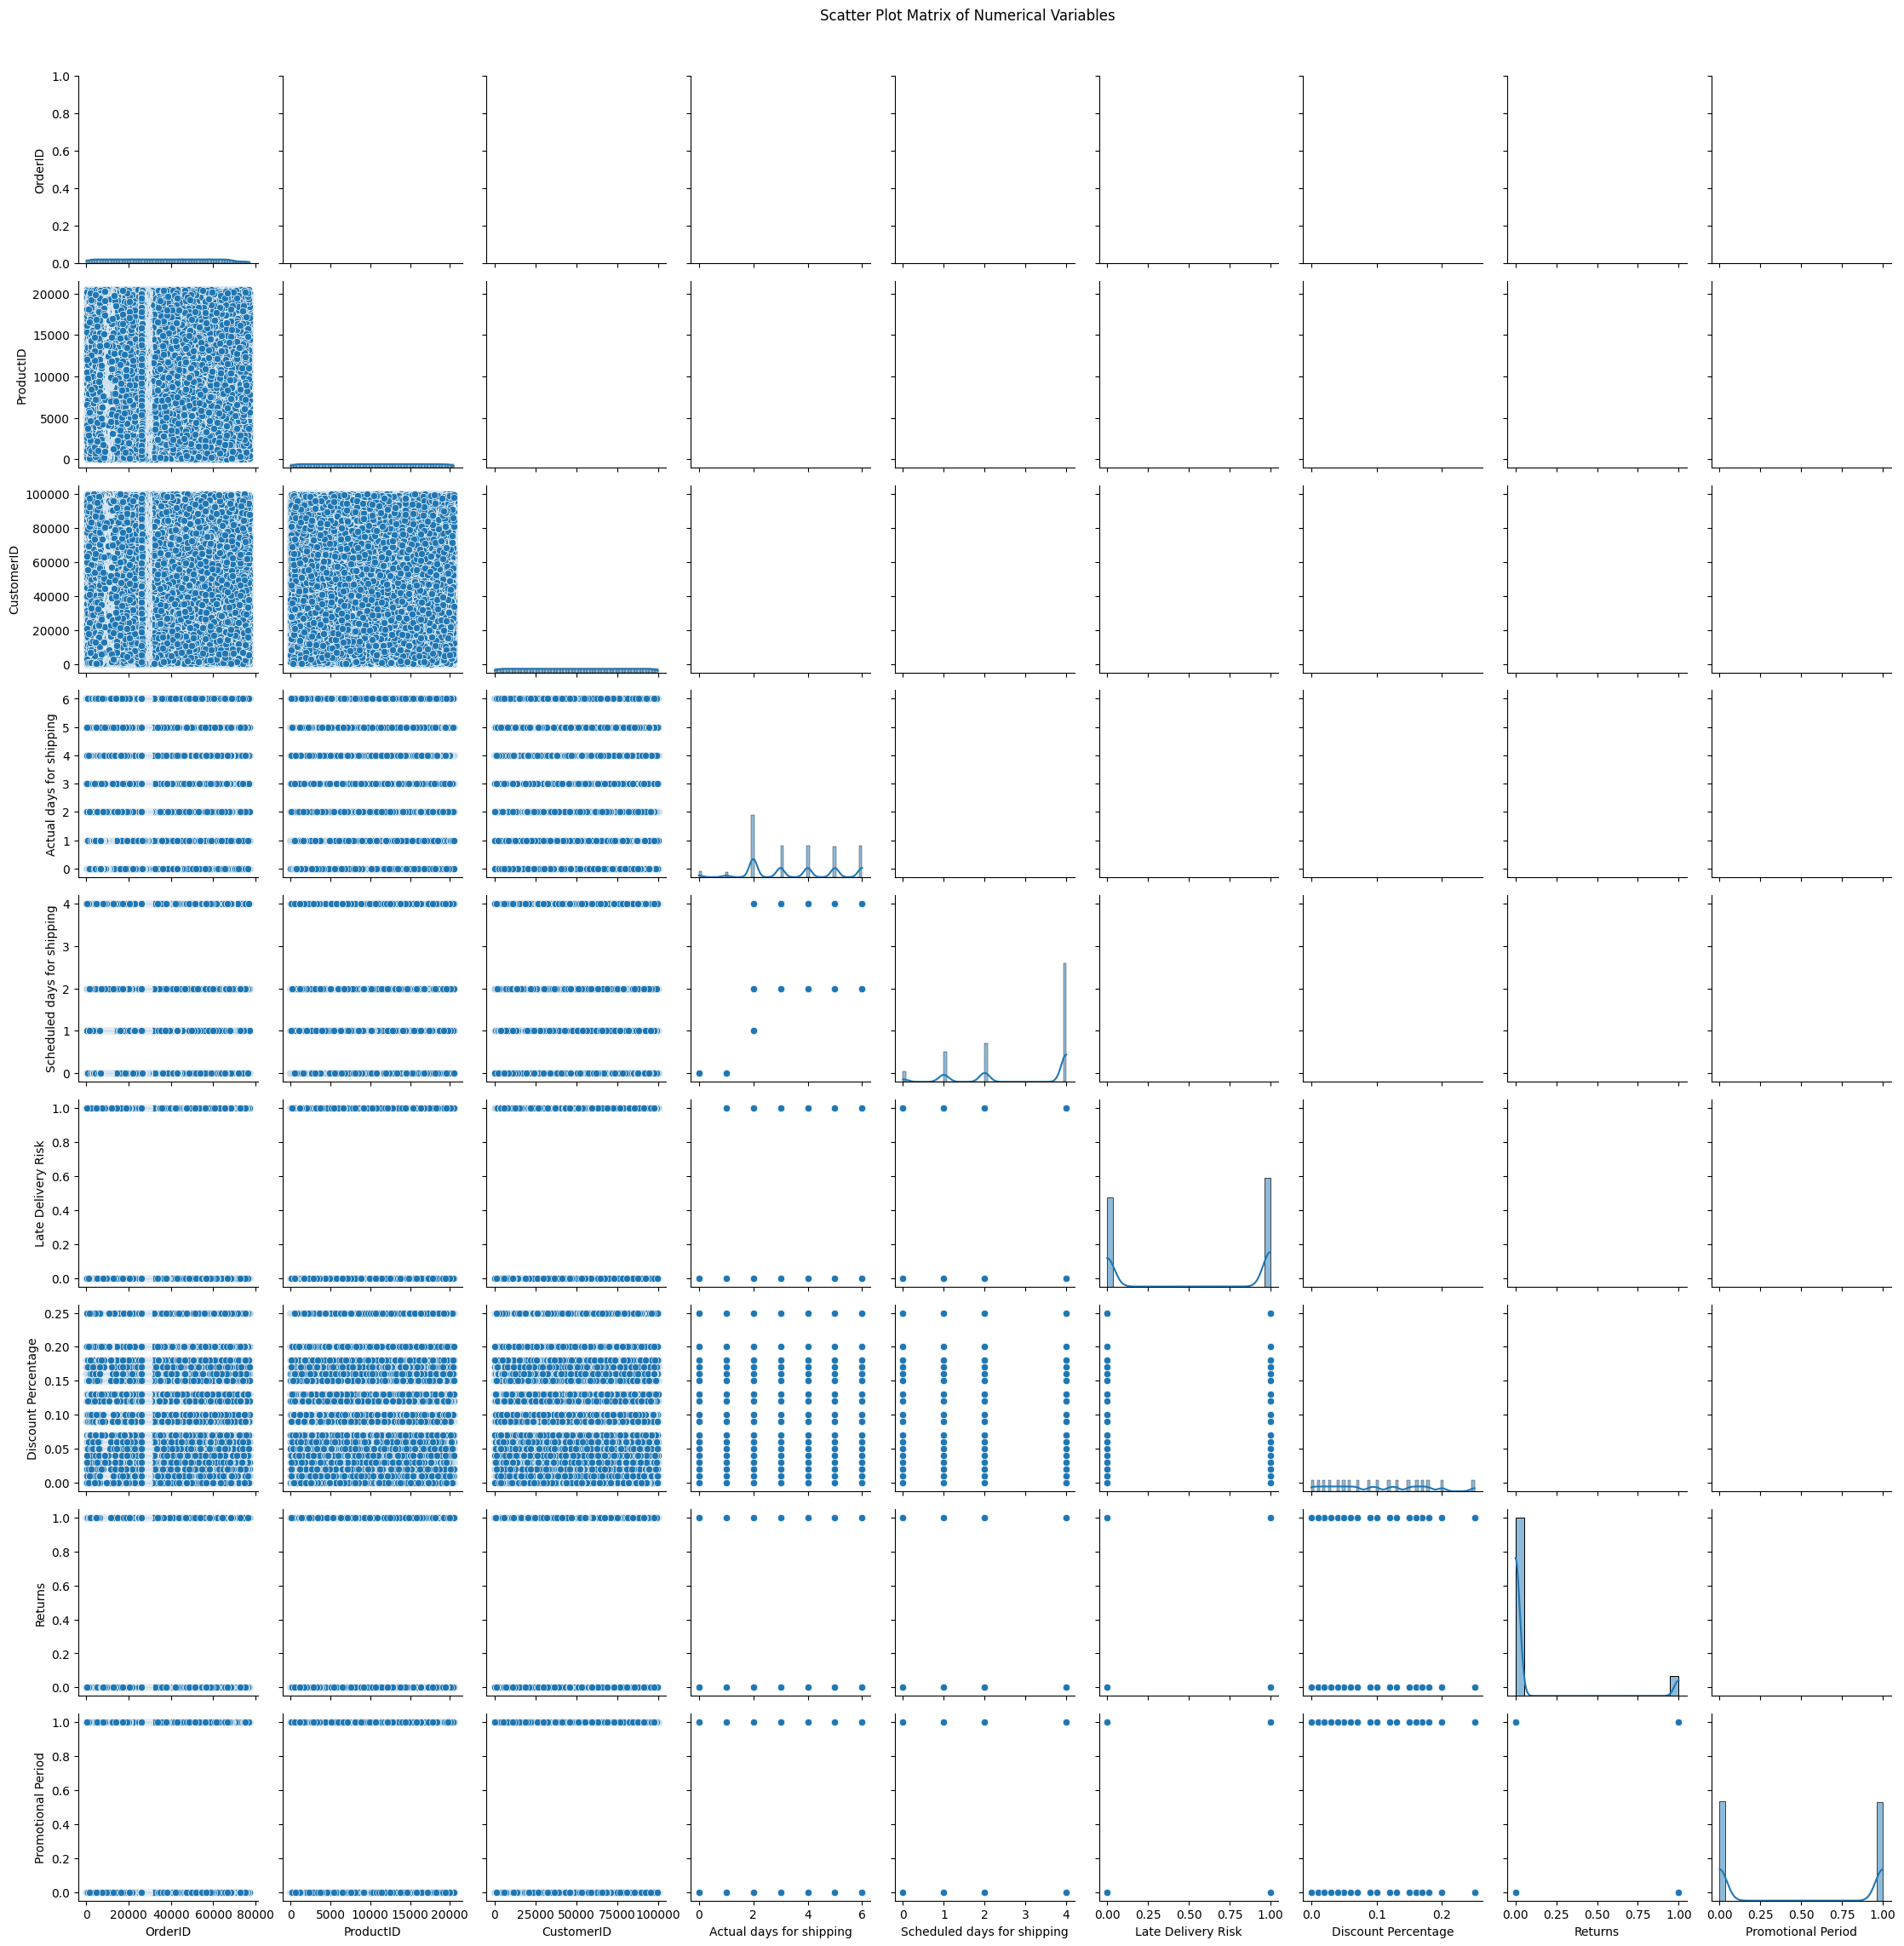

In [15]:
# Extracting numerical columns for the scatter plot matrix
numerical_columns = orders_df.select_dtypes(include=[np.number]).columns

# Creating a pair grid for scatter plots below the diagonal
grid = sns.PairGrid(orders_df, vars=numerical_columns)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot, kde=True)

# Adding titles and displaying the plot
plt.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

## Order dates

In [17]:
# Convert 'Order Date' to datetime format to find the range
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], errors='coerce')

# Finding the range of 'Order Date'
order_date_range = orders_df['Order Date'].min(), orders_df['Order Date'].max()
order_date_range

(Timestamp('2015-01-01 00:00:00'), Timestamp('2018-01-31 23:38:00'))

In [18]:
days_between_orders = (orders_df['Order Date'].max() - orders_df['Order Date'].min()).days
days_between_orders

1126

In [19]:
# Total number of orders and total number of days for recalculating accurate averages
total_orders = orders_df['OrderID'].nunique()  # unique orders in the dataset
total_days = days_between_orders + 1

# Recalculating the average number of orders per day, per month, and per year
avg_orders_per_day_corrected = total_orders / total_days
avg_orders_per_month_corrected = total_orders / (total_days / 30.44)  # average days per month
avg_orders_per_year_corrected = total_orders / (total_days / 365.25)  # average days per year

avg_orders_per_day_corrected, avg_orders_per_month_corrected, avg_orders_per_year_corrected


(58.34250221827862, 1775.9457675244012, 21309.598935226262)

Average number of orders daily, monthly and yearly are 58, 1775 and 21309 respectively

## days between earliest and latest order dates

In [20]:
# Calculating the number of days between earliest and latest order date for each customer
customer_order_span = orders_df.groupby('CustomerID')['Order Date'].agg(lambda x: (x.max() - x.min()).days)
customer_order_span.describe()

count    81577.000000
mean       287.370889
std        310.429041
min          0.000000
25%          0.000000
50%        186.000000
75%        536.000000
max       1123.000000
Name: Order Date, dtype: float64

If the days is 0, that means they only made purchase(s) in 1 day.
we will try to take a look at customers who made purchases over time. 

In [21]:
# Excluding customers with a span of 0 days
customer_order_span_nonzero = customer_order_span[customer_order_span > 0]
customer_order_span_nonzero.describe()

count    50410.000000
mean       465.043741
std        270.777447
min          1.000000
25%        238.000000
50%        456.000000
75%        678.000000
max       1123.000000
Name: Order Date, dtype: float64

Out of all 100,000 customers, 50410 of them made purchases over time, more likely to be long term customer.

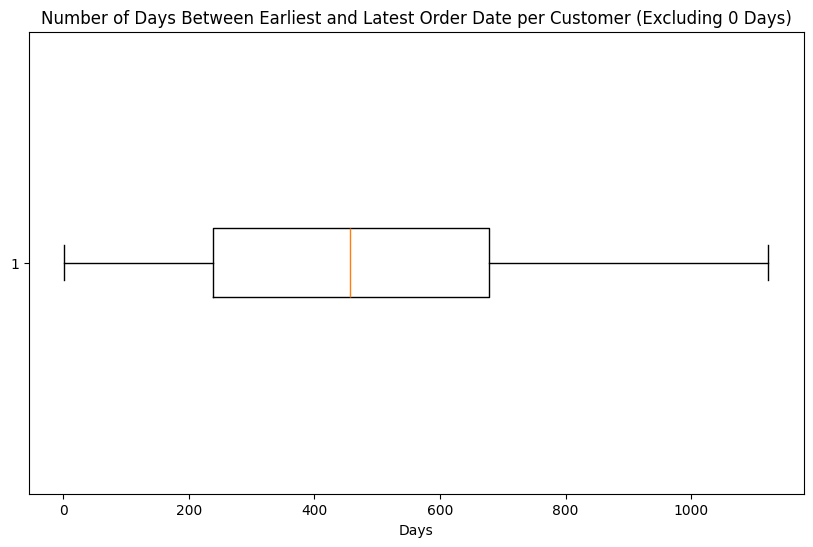

In [22]:
# Plotting a boxplot of the non-zero spans
plt.figure(figsize=(10, 6))
plt.boxplot(customer_order_span_nonzero, vert=False)
plt.title('Number of Days Between Earliest and Latest Order Date per Customer (Excluding 0 Days)')
plt.xlabel('Days')
plt.show()

Amongst these possibly long term customers, what are their average orders per month?

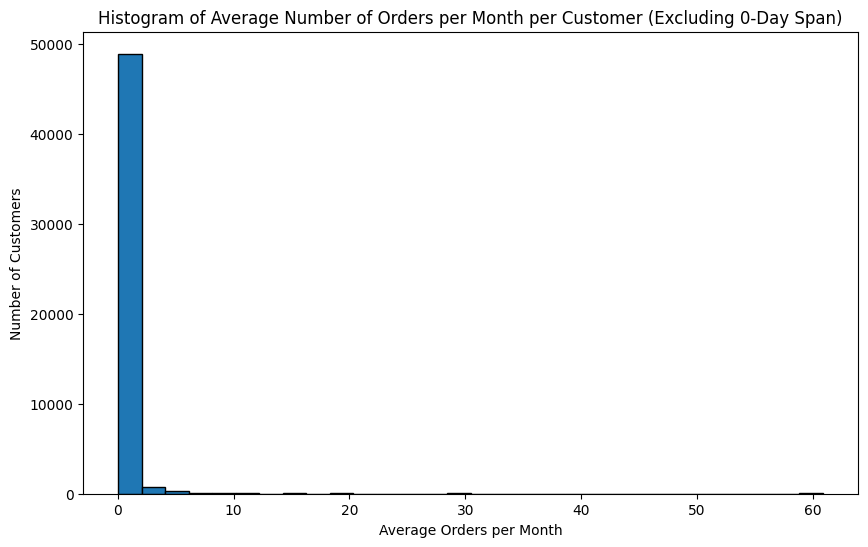

In [23]:
# First, get total orders per customer
customer_order_counts = orders_df.groupby('CustomerID')['OrderID'].nunique()

# Calculate the time span in months for each customer (excluding those with 0-day span)
customer_month_span = customer_order_span_nonzero / 30.44  # approximate days per month

# Calculate average orders per month for each customer
avg_orders_per_month_per_customer = customer_order_counts[customer_month_span.index] / customer_month_span

# Plotting a histogram for average orders per month per customer
plt.figure(figsize=(10, 6))
plt.hist(avg_orders_per_month_per_customer.dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Average Number of Orders per Month per Customer (Excluding 0-Day Span)')
plt.xlabel('Average Orders per Month')
plt.ylabel('Number of Customers')
plt.show()

In [24]:
avg_orders_per_month_per_customer.describe()

count    50410.000000
mean         0.498769
std          2.324543
min          0.054896
25%          0.128983
50%          0.187901
75%          0.315986
max         60.880000
dtype: float64

Most of these customers makes less than 1 orders per month

## orders over time

C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\4122176895.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_counts = orders_df.resample('M', on='Order Date')['OrderID'].nunique()


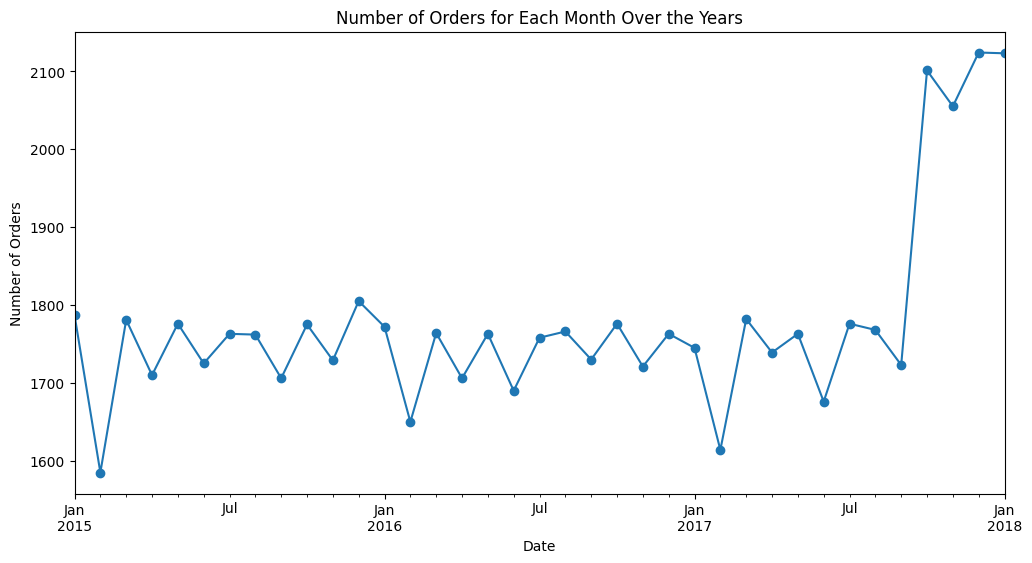

In [25]:
# Grouping data by month and year to get the total orders for each month over the years
monthly_order_counts = orders_df.resample('M', on='Order Date')['OrderID'].nunique()

# Plotting the number of orders for each month over the years
plt.figure(figsize=(12, 6))
monthly_order_counts.plot(marker='o', linestyle='-')
plt.title('Number of Orders for Each Month Over the Years')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

The number the orders spiked sharply in October 2017 and maintained until January 2018 (which is the end of this dataset)

We will remove this last part when doing our seasonal decomposition so that the trend detection will not be affected

C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\1431194865.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_counts_monthly = orders_df.resample('M', on='Order Date')['OrderID'].nunique()


<Figure size 1200x1000 with 0 Axes>

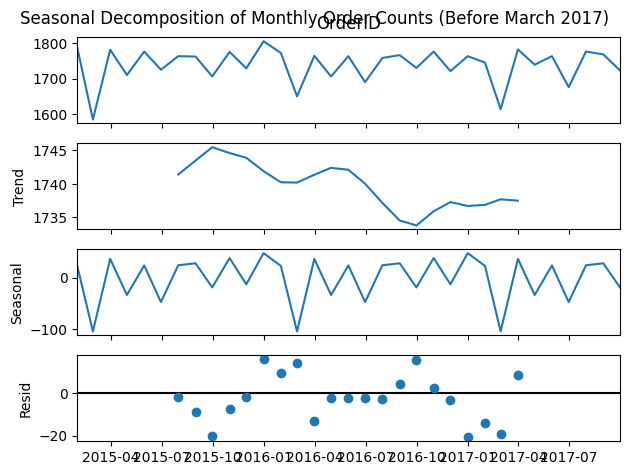

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Recalculating monthly order counts based on unique Order IDs per month
order_counts_monthly = orders_df.resample('M', on='Order Date')['OrderID'].nunique()

# Filtering the data to include only the orders before March 2017
filtered_order_counts_monthly = order_counts_monthly[order_counts_monthly.index < '2017-10-01']

# Performing decomposition on the filtered data
decomposition_filtered = seasonal_decompose(filtered_order_counts_monthly, model='additive')

# Plotting the decomposed components for the filtered data
plt.figure(figsize=(12, 10))
decomposition_filtered.plot()
plt.suptitle('Seasonal Decomposition of Monthly Order Counts (Before March 2017)')
plt.show()

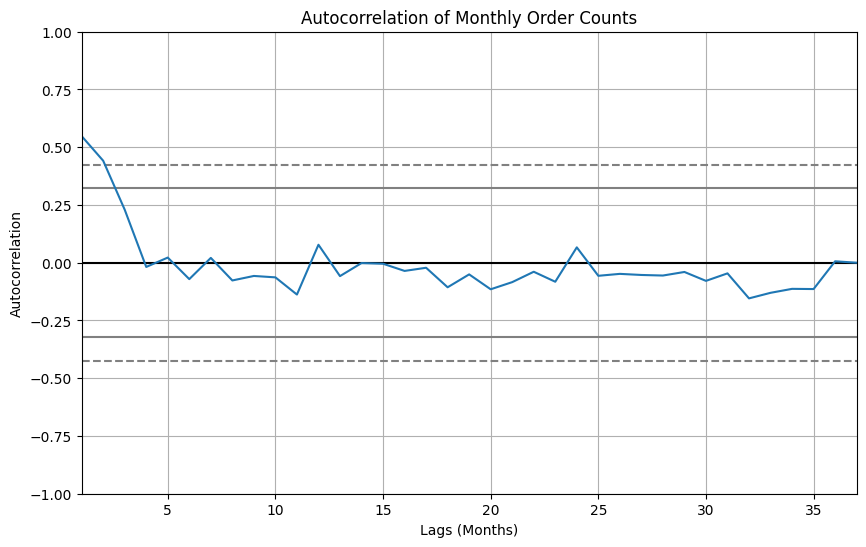

In [27]:
from pandas.plotting import autocorrelation_plot

# Plotting the autocorrelation of monthly order counts
plt.figure(figsize=(10, 6))
autocorrelation_plot(order_counts_monthly)
plt.title('Autocorrelation of Monthly Order Counts')
plt.xlabel('Lags (Months)')
plt.ylabel('Autocorrelation')
plt.show()

In this autocorrelation plot, there is a notable peak at lag 1 with a value just above 0.5, suggesting a significant short-term correlation in the monthly order counts. Beyond lag 1, the autocorrelation values decrease and generally remain within the confidence intervals, without any significant peaks at higher lags. This implies that while there is some short-term autocorrelation, there are no strong long-term or seasonal patterns in the data.

## Promo period

In [28]:
# Counting the number of orders based on the promotional period (0 or 1)
order_volume_comparison = orders_df['Promotional Period'].value_counts().rename(index={0: 'Non-Promotional', 1: 'Promotional'})

# Displaying the results
order_volume_comparison

Promotional Period
Non-Promotional    84597
Promotional        84349
Name: count, dtype: int64

Almost equal number of orders are placed during promotional period compared to non-promotional period.

C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\1259955567.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_promo_discounts.dropna(), promo_discounts.dropna()], labels=['Non-Promotional', 'Promotional'])


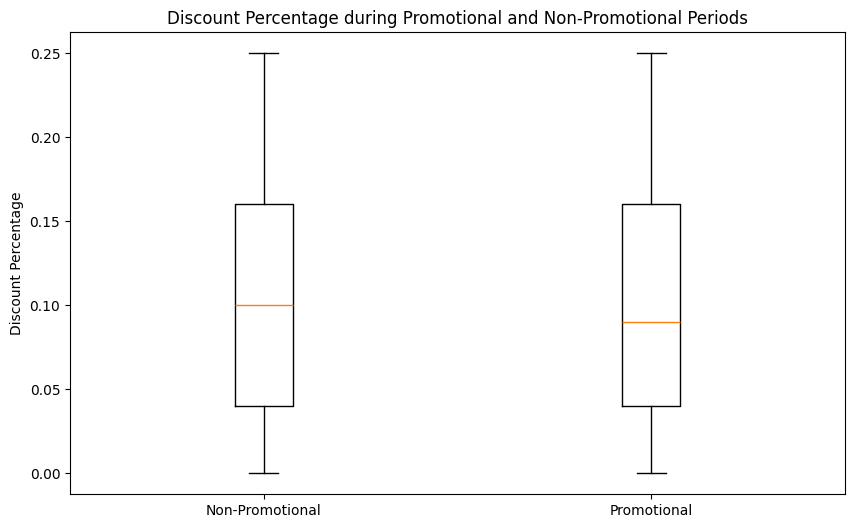

In [29]:
# Separating discount percentages for promotional and non-promotional periods
promo_discounts = orders_df[orders_df['Promotional Period'] == 1]['Discount Percentage']
non_promo_discounts = orders_df[orders_df['Promotional Period'] == 0]['Discount Percentage']

# Plotting two box plots for promotional and non-promotional discount percentages
plt.figure(figsize=(10, 6))
plt.boxplot([non_promo_discounts.dropna(), promo_discounts.dropna()], labels=['Non-Promotional', 'Promotional'])
plt.title('Discount Percentage during Promotional and Non-Promotional Periods')
plt.ylabel('Discount Percentage')
plt.show()


The promo period discount percentage is around the same as that during non-promorional period, maybe that is why the orders placed during the  promotional period is around the same as that during non-promotional period.

In [30]:
# Check if all purchases by each customer were during a promotional period
customers_promotional_only = orders_df.groupby('CustomerID')['Promotional Period'].apply(lambda x: (x == 1).all())
customers_promotional_only = customers_promotional_only[customers_promotional_only].index

len(customers_promotional_only)

24392

Out of 81577 customers who made orders, 24392 of them only made orders during promotional period. Maybe cus they didn't do price comparison so they actually thought promo period price is better.

## Year on year growth in the number of orders

In [32]:
# Extracting year from 'Order Date' to analyze year-on-year growth
orders_df['Order Year'] = orders_df['Order Date'].dt.year

# Counting the number of orders per year
yearly_order_counts = orders_df.groupby('Order Year')['OrderID'].nunique()

# Calculating year-on-year growth in percentage
year_on_year_growth = yearly_order_counts.pct_change() * 100

# Displaying the year-on-year growth alongside the yearly order counts
yearly_order_counts, year_on_year_growth.dropna()

(Order Year
 2015    20904
 2016    20859
 2017    21866
 2018     2123
 Name: OrderID, dtype: int64,
 Order Year
 2016    -0.215270
 2017     4.827652
 2018   -90.290863
 Name: OrderID, dtype: float64)

Since we only have the first few months info for 2018, we can ignore the year on year growth in 2018.

The year-on-year growth in the number of orders is as follows:

2015: 20904 orders

2016: 20859 orders (0.2% decrease from 2015)

2017: 21866 orders (4.8% increase from 2016)

# product_orders

In [52]:
# To determine the number of purchases for each product, we can count the occurrences of each ProductID in the Orders Table
product_purchase_counts = orders_df['ProductID'].value_counts()

# Merge this information with the original products table using 'Product ID' 
product_orders = products_df.merge(product_purchase_counts.rename('Number of Purchases'), left_on='ProductID', right_index=True, how='left')

## Product category orders over time

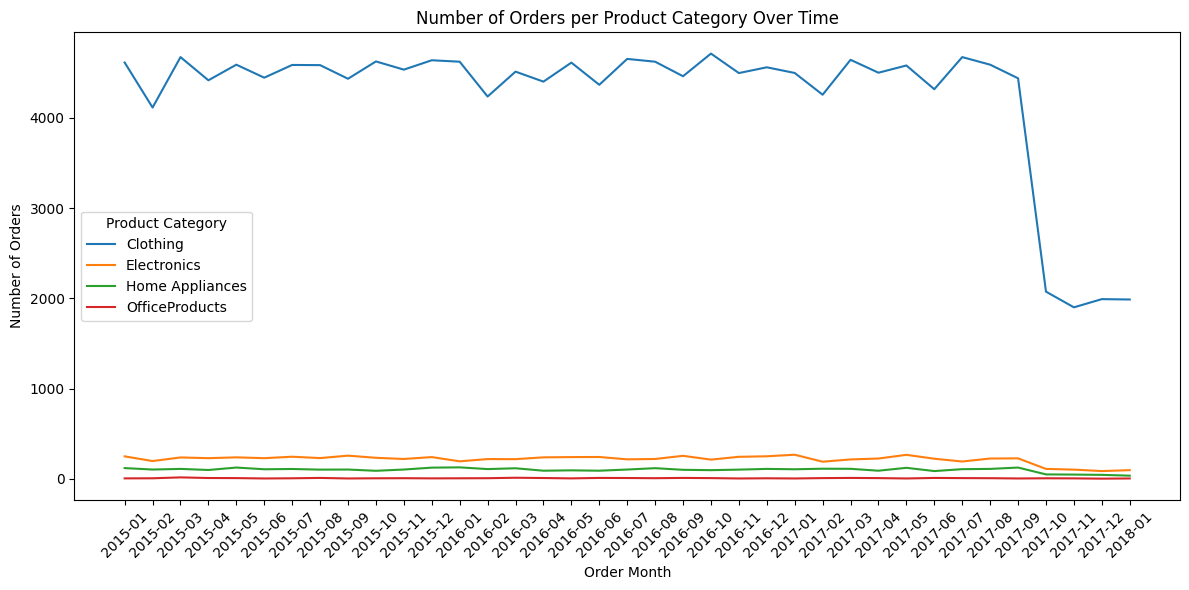

In [53]:
# Merging the two dataframes on ProductID
product_orders = pd.merge(orders_df, product_orders, on='ProductID', how='left')

# Converting 'Order Date' to datetime for time-based analysis
product_orders['Order Date'] = pd.to_datetime(product_orders['Order Date'])

# Grouping by Category and Order Date (by month) to get the number of orders over time
product_orders['Order Month'] = product_orders['Order Date'].dt.to_period('M')
order_counts_by_category = product_orders.groupby(['Order Month', 'Category']).size().unstack(fill_value=0)

# Plotting the order counts over time for each product category
plt.figure(figsize=(12, 6))
for category in order_counts_by_category.columns:
    plt.plot(order_counts_by_category.index.astype(str), order_counts_by_category[category], label=category)

plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Product Category Over Time')
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()

WE notice a decrease in orders in Clothing, Electronics and Home Appliances categories, with clothing category showing the most significant decrease since it has the most orders

Since we also know that there are more products in the Clothing category compared to other category, to make it more fair we will visualise the number of orders in each category divided by the number of products in that category over time.

In [ ]:
# Converting 'Order Date' to datetime and extracting the monthly period for aggregation
product_orders['Order Month'] = product_orders['Order Date'].dt.to_period('M')

# Count of unique products in each category
total_products_per_category = products_df.groupby('Category')['ProductID'].nunique()

# Count of orders per category over time
orders_per_category_over_time = product_orders.groupby(['Order Month', 'Category']).size().unstack(fill_value=0)

# Calculating the ratio (number of orders per category / total number of products in that category) over time
ratio_orders_to_products = orders_per_category_over_time.div(total_products_per_category, axis=1)
ratio_orders_to_products

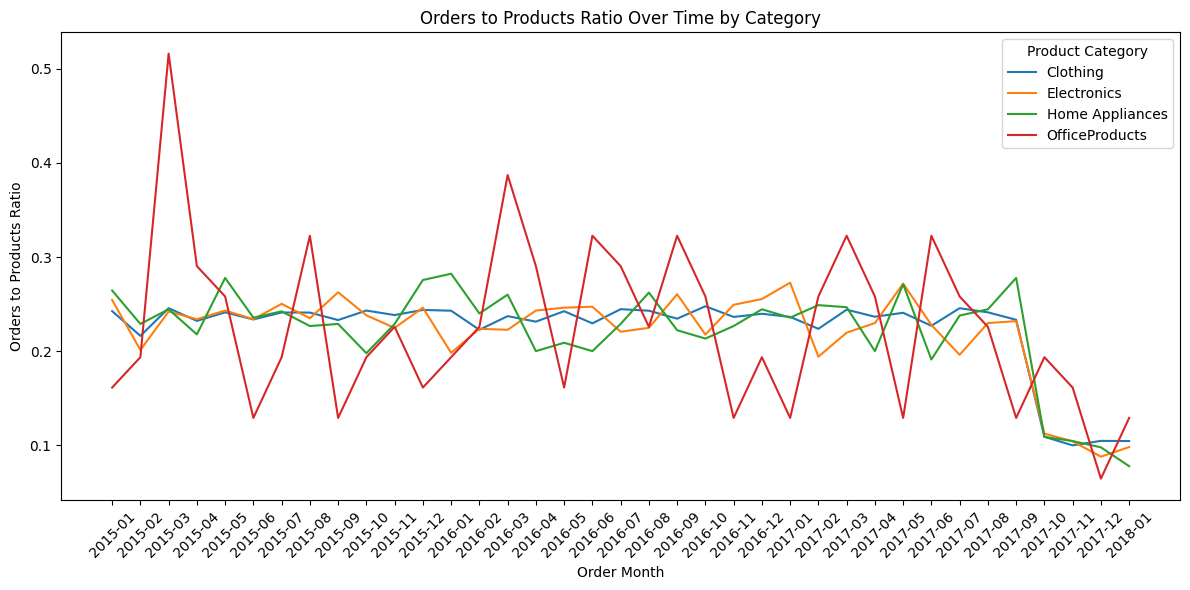

In [89]:
# Plotting the ratio of orders to total products in each category over time
plt.figure(figsize=(12, 6))
for category in ratio_orders_to_products.columns:
    plt.plot(ratio_orders_to_products.index.astype(str), ratio_orders_to_products[category], label=category)

plt.xlabel('Order Month')
plt.ylabel('Orders to Products Ratio')
plt.title('Orders to Products Ratio Over Time by Category')
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()

From here we can see that the Number of orders in the cateogory as ratio to the number of products in the category over time is around the same for Clothing, Electronics and Home Appliances; between 0.2 to 0.3. 

Office Products seems to the most fluctuations over time

We also notice all 4 ratios generally decrease at 2017 September and after 

## Purchases of most expensive and cheapest products

In [54]:
# Now, re-extract the 10 most and least expensive products, including their number of purchases
top_10_expensive = product_orders.nlargest(10, 'Price')[['Product Name', 'Price', 'Number of Purchases']]
top_10_cheapest = product_orders.nsmallest(10, 'Price')[['Product Name', 'Price', 'Number of Purchases']]

# Display the results to the user
top_10_expensive

,Product Name,Price,Number of Purchases
24317,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
47563,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
75429,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
78028,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
109436,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
147278,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,1678.8,6.0
13040,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0
21946,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0
22235,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0
29372,VU 164 cm (65 inches) The GloLED Series 4K Sma...,1020.0,6.0


In [55]:
top_10_cheapest

,Product Name,Price,Number of Purchases
9783,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,3.0
30415,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,3.0
62969,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0
80650,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0
90274,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0
93382,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0
94292,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.47,3.0
98796,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0
111170,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0
127234,Inventis 5V 1.2W Portable Flexible USB LED Lig...,0.47,7.0


## Most & least popular products

In [65]:
# Grouping by Product Name and Category to count total orders per product
top_products = product_orders.nlargest(10, columns=['Number of Purchases'])
top_products[['Product Name', 'Category', 'Price', 'Number of Purchases']]

,Product Name,Category,Price,Number of Purchases
801,Clovia Women's Cotton High Waist Hipster with ...,Clothing,5.99,22.0
4341,Clovia Women's Cotton High Waist Hipster with ...,Clothing,5.99,22.0
6242,SIRIL Women's Pum Pum Lace & Printed Poly Cott...,Clothing,39.95,22.0
15034,SIRIL Women's Pum Pum Lace & Printed Poly Cott...,Clothing,39.95,22.0
15844,Clovia Women's Cotton High Waist Hipster with ...,Clothing,5.99,22.0
21820,Clovia Women's Cotton High Waist Hipster with ...,Clothing,5.99,22.0
23963,SIRIL Women's Pum Pum Lace & Printed Poly Cott...,Clothing,39.95,22.0
26571,SIRIL Women's Pum Pum Lace & Printed Poly Cott...,Clothing,39.95,22.0
29848,SIRIL Women's Pum Pum Lace & Printed Poly Cott...,Clothing,39.95,22.0
31360,Clovia Women's Cotton High Waist Hipster with ...,Clothing,5.99,22.0


In [67]:
# Finding the 10 least popular products by total orders
product_orders.nsmallest(10, columns=['Number of Purchases'])[['Product Name', 'Category', 'Price', 'Number of Purchases']]

,Product Name,Category,Price,Number of Purchases
374,PAROPKAR Women's Cotton Ninja Stretch Jersey C...,Clothing,5.99,1.0
3781,OM SAI LATEST CREATION Soft Cotton & Silk Sare...,Clothing,23.99,1.0
3798,Cottinfab Women Black & White Striped Double-B...,Clothing,23.99,1.0
3889,DIVINATION™ Kurti Long Length Cotton Straight ...,Clothing,19.20,1.0
4826,SSoShHub Women Babydoll Lingerie for Honeymoon...,Clothing,15.59,1.0
10347,APRATIM Women's Bandhani Art Silk Dupatta,Clothing,11.99,1.0
10450,Fashion Chikan Art Women's Loose Fit Faux Geor...,Clothing,23.99,1.0
15903,MATRIKA FASHION Womens' Multicolor Jaipuri Raj...,Clothing,15.59,1.0
17218,KANCHNAR Women's Maheshwari Cotton Saree With ...,Clothing,27.95,1.0
27374,NYPA Women s Rayon Slit Printed Kurta,Clothing,17.99,1.0


# customers_orders

In [69]:
customers_df['Age Group'] = pd.cut(customers_df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])

# Merge the customers and orders datasets on CustomerID
customers_orders = pd.merge(customers_df, orders_df, on='CustomerID')

## Number of purchases by Age and Gender

C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\2535516059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_purchases = customers_orders.groupby(['Age Group', 'Gender'])['OrderID'].count().reset_index()


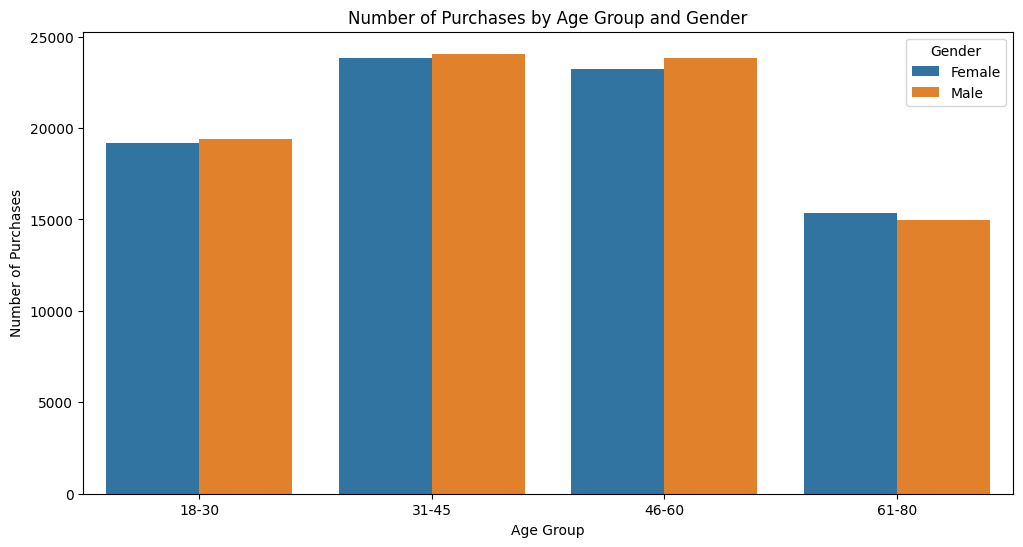

In [70]:
# Group by Age Group and Gender to find the number of purchases
age_gender_purchases = customers_orders.groupby(['Age Group', 'Gender'])['OrderID'].count().reset_index()
age_gender_purchases.rename(columns={'OrderID': 'Number of Purchases'}, inplace=True)

# Plot the number of purchases by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Number of Purchases', hue='Gender', data=age_gender_purchases)
plt.title('Number of Purchases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()

The 31-45 and 46-60 age groups generally made more purchases than the 18-30 and 61-80 age groups

But the statistical test says the difference is not significant

In [71]:
# Perform ANOVA to check if Age Group has an effect on the number of purchases
# For ANOVA, we need to compare the means of purchases across different age groups
anova_data = customers_orders.groupby('Age Group')['OrderID'].count().reset_index()
anova_data.rename(columns={'OrderID': 'Number of Purchases'}, inplace=True)

# Prepare the data for ANOVA test
from scipy.stats import f_oneway

# Separate the data by age group for ANOVA
age_18_30 = customers_orders[customers_orders['Age Group'] == '18-30']['OrderID']
age_31_45 = customers_orders[customers_orders['Age Group'] == '31-45']['OrderID']
age_46_60 = customers_orders[customers_orders['Age Group'] == '46-60']['OrderID']
age_61_80 = customers_orders[customers_orders['Age Group'] == '61-80']['OrderID']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(age_18_30, age_31_45, age_46_60, age_61_80)

# Display the ANOVA results and age group purchase summary
anova_results = {
    "F-statistic": f_statistic,
    "P-value": p_value
}
anova_results, age_gender_purchases

C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\791274678.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_data = customers_orders.groupby('Age Group')['OrderID'].count().reset_index()


({'F-statistic': 0.7013218283296513, 'P-value': 0.5511123678608456},
   Age Group  Gender  Number of Purchases
 0     18-30  Female                19174
 1     18-30    Male                19389
 2     31-45  Female                23818
 3     31-45    Male                24066
 4     46-60  Female                23243
 5     46-60    Male                23818
 6     61-80  Female                15359
 7     61-80    Male                14981)

The high P-value (greater than 0.05) suggests that there is no statistically significant difference in the number of purchases across the different age groups. This means that age group does not appear to have a significant effect on the number of purchases.

# customers_orders_products

In [72]:
customer_orders_products = pd.merge(customers_orders, products_df, on='ProductID')

In [76]:
customer_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168946 entries, 0 to 168945
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CustomerID                   168946 non-null  int64         
 1   Age                          168946 non-null  int64         
 2   Gender                       168946 non-null  object        
 3   Payment Method               168946 non-null  object        
 4   Churn                        168946 non-null  int64         
 5   Tenure                       168946 non-null  float64       
 6   HourSpendOnApp               168946 non-null  float64       
 7   NumberOfDeviceRegistered     168946 non-null  int64         
 8   SatisfactionScore            168946 non-null  int64         
 9   OrderAmountHikeFromlastYear  168946 non-null  float64       
 10  CouponUsed                   168946 non-null  float64       
 11  OrderCount                

## Total spending

In [82]:
each_customer_total_spending = customer_orders_products.groupby(['CustomerID'])['Price'].sum().reset_index()
each_customer_total_spending

,CustomerID,Price
0,1,22.78
1,2,167.31
2,3,22.66
3,5,61.40
4,6,20.16
...,...,...
81572,99994,75.58
81573,99995,118.60
81574,99996,45.59
81575,99997,47.99


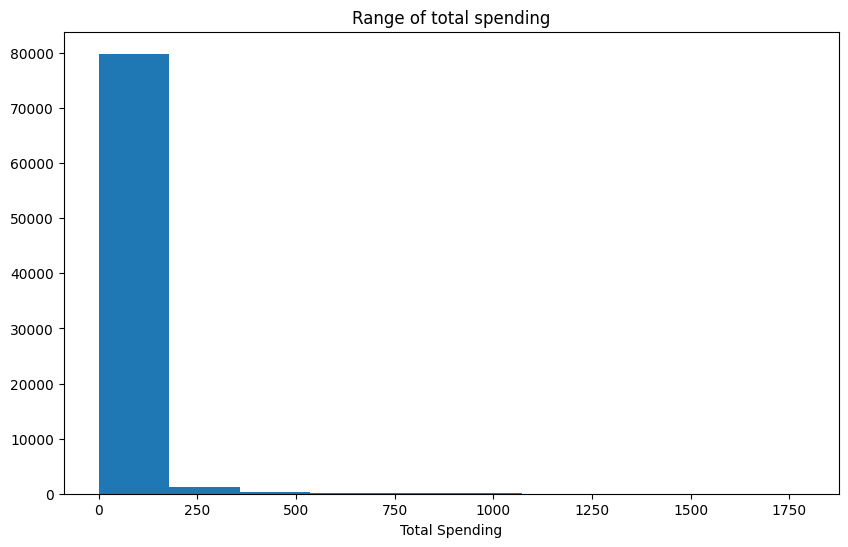

In [87]:
# Plotting a boxplot of the non-zero spans
plt.figure(figsize=(10, 6))
plt.hist(x = each_customer_total_spending['Price'])
plt.title('Range of total spending')
plt.xlabel('Total Spending')
plt.show()

Most customers has a total spending less than 250

In [85]:
each_customer_total_spending['Price'].describe()

count    81577.000000
mean        50.640659
std         62.904463
min          0.470000
25%         19.190000
50%         35.990000
75%         62.370000
max       1785.560000
Name: Price, dtype: float64

## Monthly Average spending

In [101]:
# Calculating the duration between earliest and latest order date for each customer
order_duration = customer_orders_products.groupby('CustomerID')['Order Date'].agg(['min', 'max']).reset_index()
order_duration['DurationDays'] = (order_duration['max'] - order_duration['min']).dt.days

# Merging total spending and order duration
customer_spending_duration = pd.merge(each_customer_total_spending, order_duration, on='CustomerID', how='left')


# Filtering out customers with an order duration of 0 days
customer_spending_duration_filtered = customer_spending_duration[customer_spending_duration['DurationDays'] > 0]

# Recalculating the average monthly spending for the filtered data
customer_spending_duration_filtered['AvgMonthlySpending'] = (
    customer_spending_duration_filtered['Price'] / (customer_spending_duration_filtered['DurationDays'] / 30)
)


C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\2663201774.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_spending_duration_filtered['AvgMonthlySpending'] = (


In [102]:
customer_spending_duration_filtered['AvgMonthlySpending'].describe()

count    50410.000000
mean        12.124062
std         80.076932
min          0.253918
25%          2.330388
50%          3.912552
75%          7.299035
max       6695.400000
Name: AvgMonthlySpending, dtype: float64

Most customers spend less then 10 dollars per month between their first and last order date. Those who have only made purchases on 1 day have been omitted so that it does not result in infinity in ave spending calculation

## Most bought category for each customer

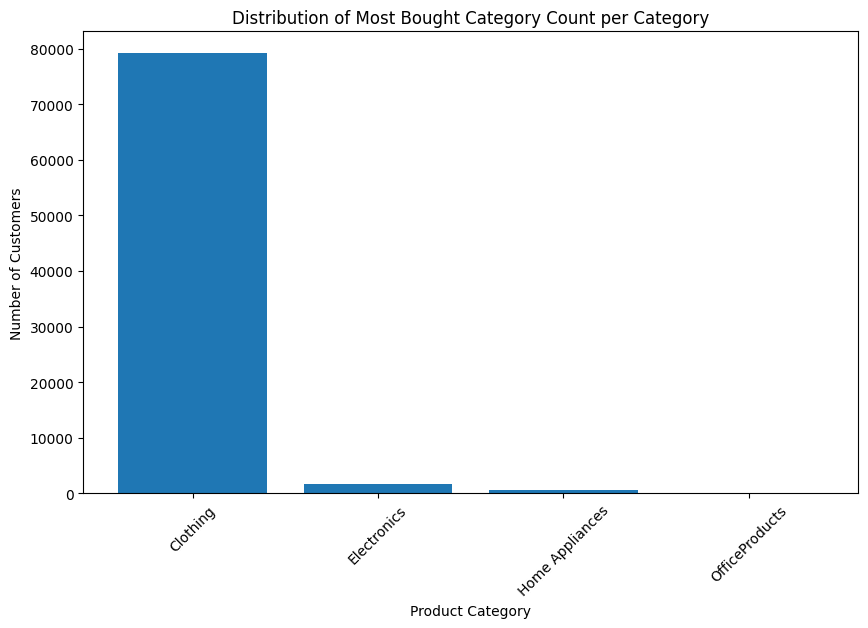

In [93]:
# Group by CustomerID and Category, and count the occurrences to find the most bought category for each customer
most_bought_category = (
    customer_orders_products.groupby(['CustomerID', 'Category'])
    .size()
    .reset_index(name='PurchaseCount')
)

# For each customer, find the category with the maximum PurchaseCount
most_bought_category_per_customer = most_bought_category.loc[
    most_bought_category.groupby('CustomerID')['PurchaseCount'].idxmax()
]

# Count how many customers have each category as their most bought category
category_count_distribution = (
    most_bought_category_per_customer['Category']
    .value_counts()
    .reset_index(name='CustomerCount')
    .rename(columns={'index': 'Category'})
)

# Plotting the distribution of the most bought category count for each category
plt.figure(figsize=(10, 6))
plt.bar(category_count_distribution['Category'], category_count_distribution['CustomerCount'])
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.title('Distribution of Most Bought Category Count per Category')
plt.xticks(rotation=45)
plt.show()

In [95]:
most_bought_category

,CustomerID,Category,PurchaseCount
0,1,Clothing,2
1,2,Clothing,2
2,2,Electronics,1
3,2,Home Appliances,1
4,3,Clothing,2
...,...,...,...
90840,99994,Clothing,3
90841,99995,Clothing,3
90842,99996,Clothing,1
90843,99997,Clothing,1


## Total Spending by Age and gender

C:\Users\yipin\AppData\Local\Temp\ipykernel_28592\1018800310.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spending_by_age_gender = customer_orders_products.groupby(['Age Group', 'Gender'])['Price'].sum().reset_index()


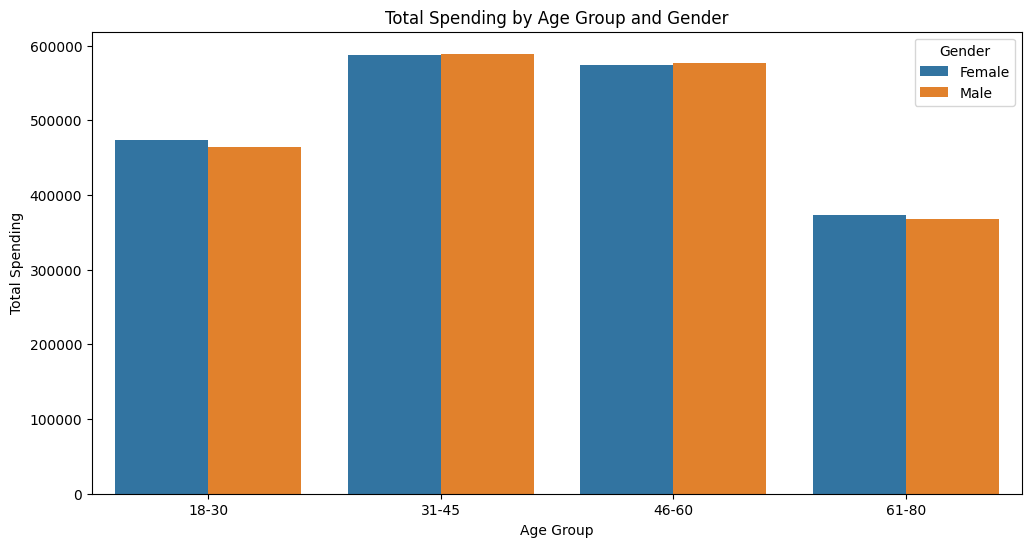

In [77]:
# Group by Age Group and Gender to calculate the total spending
total_spending_by_age_gender = customer_orders_products.groupby(['Age Group', 'Gender'])['Price'].sum().reset_index()

# Plot total spending by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Price', hue='Gender', data=total_spending_by_age_gender)
plt.title('Total Spending by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.show()

In [78]:
# Separate the data by age group for ANOVA
spending_18_30 = customer_orders_products[customer_orders_products['Age Group'] == '18-30']['Price']
spending_31_45 = customer_orders_products[customer_orders_products['Age Group'] == '31-45']['Price']
spending_46_60 = customer_orders_products[customer_orders_products['Age Group'] == '46-60']['Price']
spending_61_80 = customer_orders_products[customer_orders_products['Age Group'] == '61-80']['Price']

# Perform the ANOVA test to check if Age Group has an effect on total spending
f_statistic_spending, p_value_spending = f_oneway(spending_18_30, spending_31_45, spending_46_60, spending_61_80)

# Display the ANOVA results and total spending summary
anova_spending_results = {
    "F-statistic": f_statistic_spending,
    "P-value": p_value_spending
}
anova_spending_results,

({'F-statistic': 0.24286609359251365, 'P-value': 0.8664574689387026},)

The differnce in spending pattern across age groups is not statistically significant